# Traffic Congestion Prediction

### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

### Import Dataset

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60


In [4]:
df.tail()

,row_id,time,x,y,direction,congestion
848830,848830,1991-09-30 11:40:00,2,3,NB,54
848831,848831,1991-09-30 11:40:00,2,3,NE,28
848832,848832,1991-09-30 11:40:00,2,3,SB,68
848833,848833,1991-09-30 11:40:00,2,3,SW,17
848834,848834,1991-09-30 11:40:00,2,3,WB,24


In [5]:
data = df.copy()

## Feature Engineering

#### Splitting the 'time' feature into individual 'Date' and 'Time'

In [6]:
df[['Date', 'Time']] = df['time'].str.split(' ', expand=True)

In [7]:
df

,row_id,time,x,y,direction,congestion,Date,Time
0,0,1991-04-01 00:00:00,0,0,EB,70,1991-04-01,00:00:00
1,1,1991-04-01 00:00:00,0,0,NB,49,1991-04-01,00:00:00
2,2,1991-04-01 00:00:00,0,0,SB,24,1991-04-01,00:00:00
3,3,1991-04-01 00:00:00,0,1,EB,18,1991-04-01,00:00:00
4,4,1991-04-01 00:00:00,0,1,NB,60,1991-04-01,00:00:00
...,...,...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,NB,54,1991-09-30,11:40:00
848831,848831,1991-09-30 11:40:00,2,3,NE,28,1991-09-30,11:40:00
848832,848832,1991-09-30 11:40:00,2,3,SB,68,1991-09-30,11:40:00
848833,848833,1991-09-30 11:40:00,2,3,SW,17,1991-09-30,11:40:00


In [8]:
df[['Year', 'Month', 'Date']] = df['Date'].str.split('-', expand=True)

In [9]:
df

,row_id,time,x,y,direction,congestion,Date,Time,Year,Month
0,0,1991-04-01 00:00:00,0,0,EB,70,01,00:00:00,1991,04
1,1,1991-04-01 00:00:00,0,0,NB,49,01,00:00:00,1991,04
2,2,1991-04-01 00:00:00,0,0,SB,24,01,00:00:00,1991,04
3,3,1991-04-01 00:00:00,0,1,EB,18,01,00:00:00,1991,04
4,4,1991-04-01 00:00:00,0,1,NB,60,01,00:00:00,1991,04
...,...,...,...,...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,NB,54,30,11:40:00,1991,09
848831,848831,1991-09-30 11:40:00,2,3,NE,28,30,11:40:00,1991,09
848832,848832,1991-09-30 11:40:00,2,3,SB,68,30,11:40:00,1991,09
848833,848833,1991-09-30 11:40:00,2,3,SW,17,30,11:40:00,1991,09


In [10]:
df = df.drop(['time','row_id'], axis=1)
df.head()

,x,y,direction,congestion,Date,Time,Year,Month
0,0,0,EB,70,01,00:00:00,1991,04
1,0,0,NB,49,01,00:00:00,1991,04
2,0,0,SB,24,01,00:00:00,1991,04
3,0,1,EB,18,01,00:00:00,1991,04
4,0,1,NB,60,01,00:00:00,1991,04


In [11]:
numberOfDays = len(df.Date.unique())
print("Total number of Days: ", numberOfDays)
timePeriods = len(df.Time.unique())
print("Total number of TimePeriods: ", timePeriods)
directions = len(df.direction.unique())
print("Total number of Directions: ", directions)

Total number of Days:  31
Total number of TimePeriods:  72
Total number of Directions:  8


In [12]:
df.direction.unique()

array(['EB', 'NB', 'SB', 'WB', 'NE', 'SW', 'NW', 'SE'], dtype=object)

### Exploratory Data Analysis

<AxesSubplot:xlabel='direction', ylabel='count'>

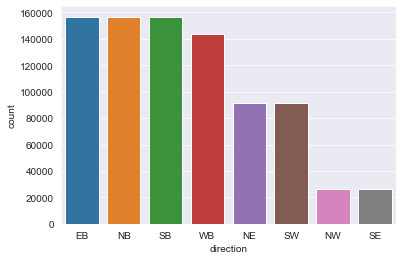

In [13]:
sns.set_style('darkgrid')
sns.countplot(x='direction', data=df)

In [14]:
df.isnull().sum()

x             0
y             0
direction     0
congestion    0
Date          0
Time          0
Year          0
Month         0
dtype: int64

Text(0.5, 1.0, 'Direction vs Congestion')

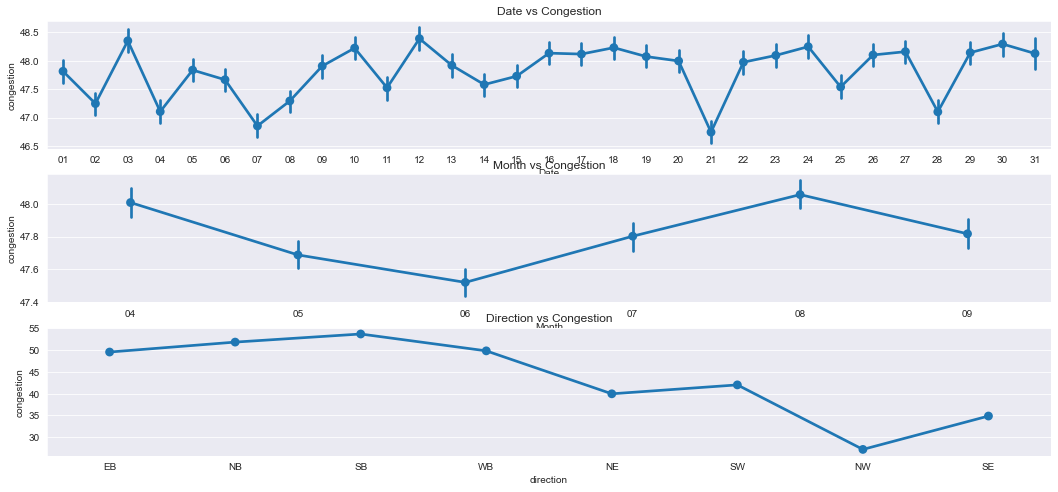

In [15]:
f,ax=plt.subplots(3,1,figsize=(18,8))
sns.pointplot(x='Date',y='congestion',kind='point',data=df, ax=ax[0])
ax[0].set_title('Date vs Congestion')
sns.pointplot(x='Month',y='congestion',kind='point',data=df, ax=ax[1])
ax[1].set_title('Month vs Congestion')
sns.pointplot(x='direction',y='congestion',kind='point',data=df, ax=ax[2])
ax[2].set_title('Direction vs Congestion')

In [16]:
data['time'] = pd.to_datetime(data['time'])
df['Day'] = data.time.dt.strftime("%A")
df['Minute'] = data['time'].dt.minute
df['Hour'] = data['time'].dt.hour
df.head()

,x,y,direction,congestion,Date,Time,Year,Month,Day,Minute,Hour
0,0,0,EB,70,01,00:00:00,1991,04,Monday,0,0
1,0,0,NB,49,01,00:00:00,1991,04,Monday,0,0
2,0,0,SB,24,01,00:00:00,1991,04,Monday,0,0
3,0,1,EB,18,01,00:00:00,1991,04,Monday,0,0
4,0,1,NB,60,01,00:00:00,1991,04,Monday,0,0


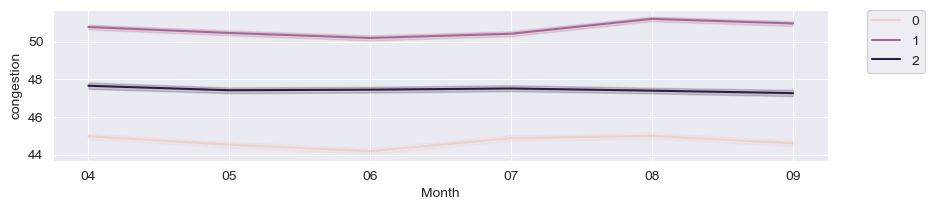

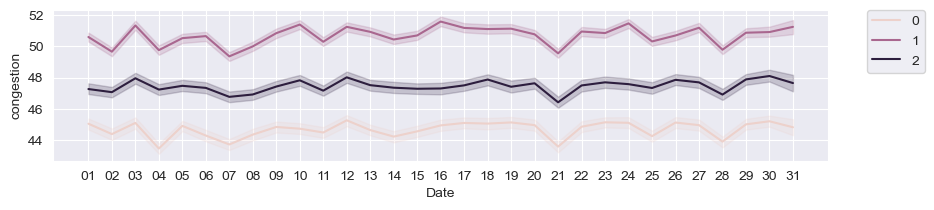

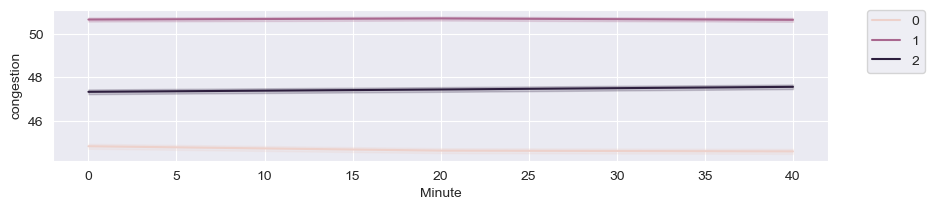

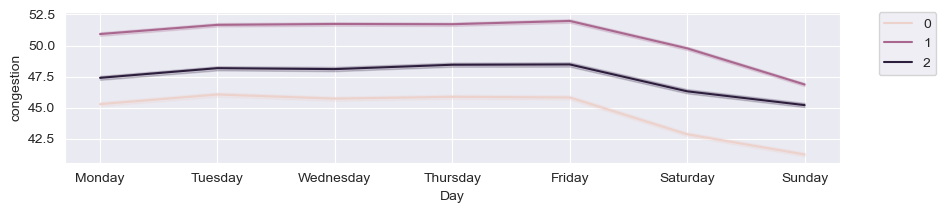

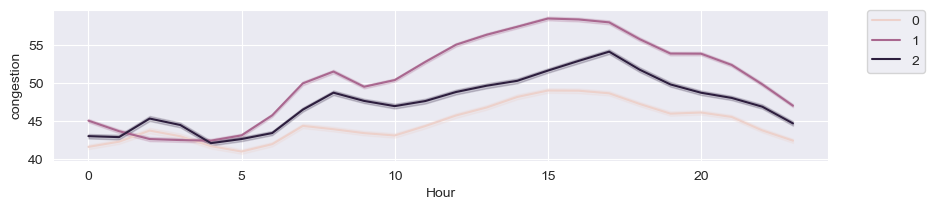

In [17]:
created_feature = ['Month', 'Date', 'Minute', 'Day','Hour']

for i in created_feature:
    plt.figure(figsize=(10, 2), dpi=100)
    ax = sns.lineplot(x=df[i], y='congestion', data=df, hue='x')
    plt.legend(bbox_to_anchor = (1.05, 1), loc=2, borderaxespad=0.)

### From the above plot following things can be concluded:

- Monthly, throughout all the dates there is a good consistency in data.

- For a day, we can see that are peaks during morning and evening times and a decline during night hours. This is as per expectation.

- For weekly patterns, Sundays enjoy smoother traffic as there are lesser vehicles on roads. Whereas Monday to Friday the traffic is steady.

- For dates, '0' x coordinate have smoother traffic while '1' is highly congested.

- For hourly patterns, there is a peak in congestion between 15-20 hours and then a downfall during night. Morning hours have smoother traffic.

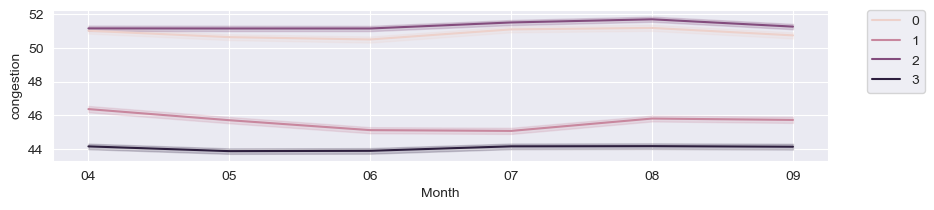

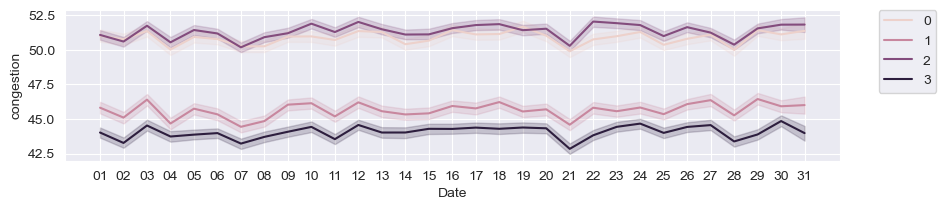

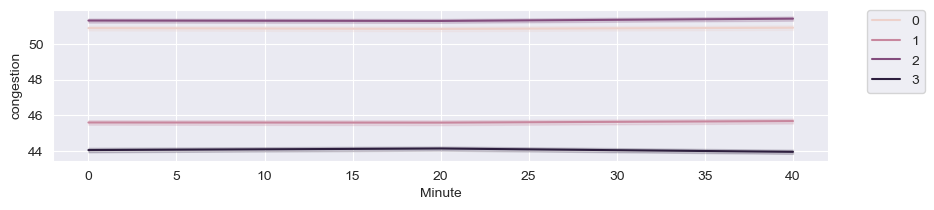

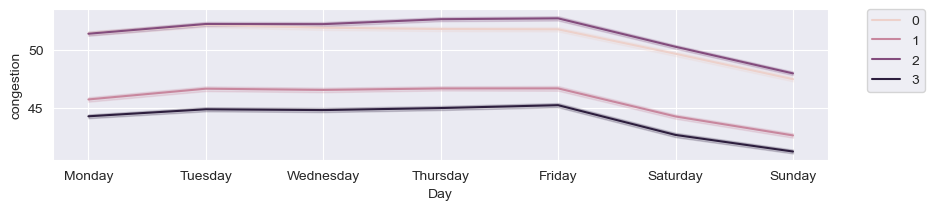

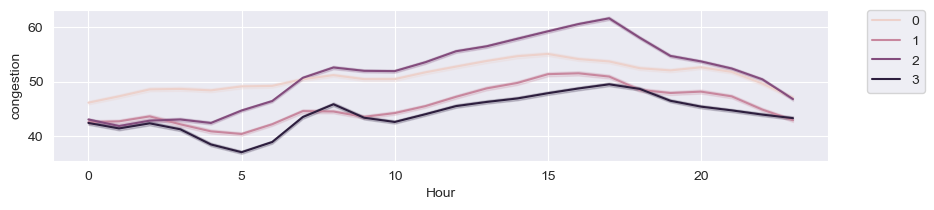

In [18]:
created_feature = ['Month', 'Date', 'Minute', 'Day','Hour']

for i in created_feature:
    plt.figure(figsize=(10, 2), dpi=100)
    ax = sns.lineplot(x=df[i], y='congestion', data=df, hue='y')
    plt.legend(bbox_to_anchor = (1.05, 1), loc=2, borderaxespad=0.)

### From the above plot following things can be concluded:

- Monthly, throughout all the dates there is a good consistency in data.

- For a day, we can see that are peaks during morning and evening times and a decline during night hours. This is as per expectation.

- For weekly patterns, Sundays enjoy smoother traffic as there are lesser vehicles on roads. Whereas Monday to Friday the traffic is steady.

- For dates, '1' and '3' y coordinate have smoother traffic than the '0' and '2' coordinate.

- For hourly patterns, there is a peak in congestion between 15-20 hours and then a downfall during night. Morning hours have smoother traffic.

## Encoding the Categorical Features

In [19]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Dir_Encoded'] = label.fit_transform(df['direction'])
df['Day_Encoded'] = label.fit_transform(df['Day'])
df

,x,y,direction,congestion,Date,Time,Year,Month,Day,Minute,Hour,Dir_Encoded,Day_Encoded
0,0,0,EB,70,01,00:00:00,1991,04,Monday,0,0,0,1
1,0,0,NB,49,01,00:00:00,1991,04,Monday,0,0,1,1
2,0,0,SB,24,01,00:00:00,1991,04,Monday,0,0,4,1
3,0,1,EB,18,01,00:00:00,1991,04,Monday,0,0,0,1
4,0,1,NB,60,01,00:00:00,1991,04,Monday,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
848830,2,3,NB,54,30,11:40:00,1991,09,Monday,40,11,1,1
848831,2,3,NE,28,30,11:40:00,1991,09,Monday,40,11,2,1
848832,2,3,SB,68,30,11:40:00,1991,09,Monday,40,11,4,1
848833,2,3,SW,17,30,11:40:00,1991,09,Monday,40,11,6,1


In [20]:
df = df.drop(['direction','Day','Time'],axis=1)
df.head()

,x,y,congestion,Date,Year,Month,Minute,Hour,Dir_Encoded,Day_Encoded
0,0,0,70,01,1991,04,0,0,0,1
1,0,0,49,01,1991,04,0,0,1,1
2,0,0,24,01,1991,04,0,0,4,1
3,0,1,18,01,1991,04,0,0,0,1
4,0,1,60,01,1991,04,0,0,1,1


<AxesSubplot:>

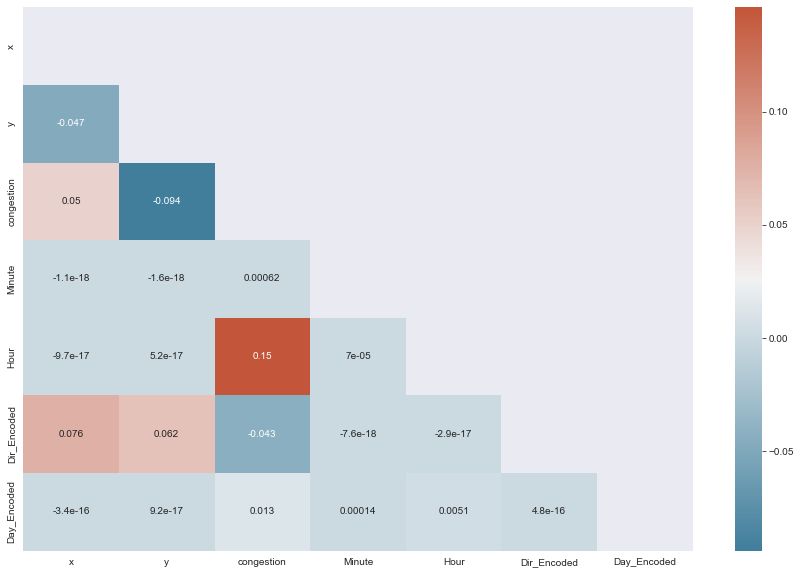

In [21]:
f, ax = plt.subplots(figsize=(15, 10))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df.corr(), annot=True, mask = mask, cmap=cmap)

In [22]:
X = df.drop(['congestion'], axis=1)
y = df['congestion']

## Splitting the data into training and testing data

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

### Decision Tree Regressor Model

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15)
cross_val_score(regressor, X_train, y_train, cv=10)

array([0.70482058, 0.70350222, 0.70333978, 0.70149989, 0.69951185,
       0.70069254, 0.70184663, 0.70143022, 0.69955474, 0.70016127])

In [50]:
from sklearn.metrics import mean_squared_error
regressor.fit(X_train,y_train)
pred_1 = regressor.predict(X_test)
print("MSE for Decision Tree Regressor: ",mean_squared_error(pred_1,y_test))

MSE for Decision Tree Regressor:  83.49241342681472


In [51]:
regressor.score(X_test,y_test)

0.7052606256702088

### Random Forest Regressor Model

In [26]:
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators = 10, random_state=0)
cross_val_score(regressor1, X_train, y_train, cv=10)

array([0.72504809, 0.72260365, 0.72302774, 0.7232101 , 0.72186085,
       0.72147774, 0.72758504, 0.72012057, 0.7212517 , 0.72194552])

In [37]:
regressor1.fit(X_train,y_train)
pred_2 = regressor1.predict(X_test)
print("MSE for Random Forest Regressor: ",mean_squared_error(y_test,pred_2))

MSE for Random Forest Regressor:  77.46891533690292


In [34]:
regressor1.score(X_test,y_test)

0.7265243786919546

### Support Vector Regressor Model

In [31]:
from sklearn.svm import SVR
regressor2 = SVR(max_iter=10, kernel='rbf')
cross_val_score(regressor2, X_train, y_train, cv=10)

C:\Users\kashi\Anaconda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\kashi\Anaconda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\kashi\Anaconda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\kashi\Anaconda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminate

array([-0.0160955 , -0.01789609, -0.01614015, -0.01878109, -0.01692045,
       -0.01612866, -0.01668606, -0.01793056, -0.01801027, -0.01554968])

In [32]:
regressor2.fit(X_train,y_train)
pred_3 = regressor2.predict(X_test)
print("MSE for Support Vector Regressor: ",mean_squared_error(pred_3,y_test))

C:\Users\kashi\Anaconda\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


MSE for Support Vector Regressor:  287.9689874978928


In [35]:
regressor2.score(X_test,y_test)

-0.01656899972007997

## MSE for all three models:
- Decision Tree: 83.49
- Random Forest: 77.46
-          SVR : 287.96      

## Accuracy Scores of all three models:
- Decision Tree: 70.52
- Random Forest: 72.65
-          SVR : -0.016